# Explore here

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA

In [2]:
main_df = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/alternative-time-series-project/main/sales.csv')

In [3]:
main_df.shape

(366, 2)

In [4]:
main_df.head()

,date,sales
0,2022-09-03 17:10:08.079328,55.292157
1,2022-09-04 17:10:08.079328,53.803211
2,2022-09-05 17:10:08.079328,58.141693
3,2022-09-06 17:10:08.079328,64.530899
4,2022-09-07 17:10:08.079328,66.013633


In [5]:
main_df.dtypes

date      object
sales    float64
dtype: object

In [6]:
main_df['date'] = pd.to_datetime(main_df['date'])

In [7]:
main_df.dtypes

date     datetime64[ns]
sales           float64
dtype: object

In [8]:
main_df = main_df.set_index('date')

In [24]:
main_df.head()

,sales
date,
2022-09-03 17:10:08.079328,55.292157
2022-09-04 17:10:08.079328,53.803211
2022-09-05 17:10:08.079328,58.141693
2022-09-06 17:10:08.079328,64.530899
2022-09-07 17:10:08.079328,66.013633


<Axes: xlabel='date'>

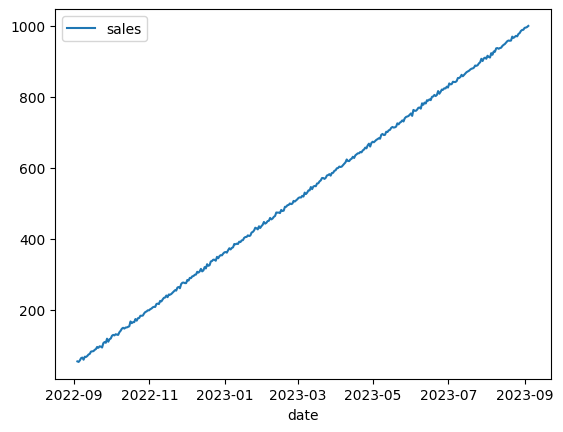

In [25]:
sns.lineplot(data = main_df)

In [28]:
result = seasonal_decompose(main_df['sales'], model='multiplicative')

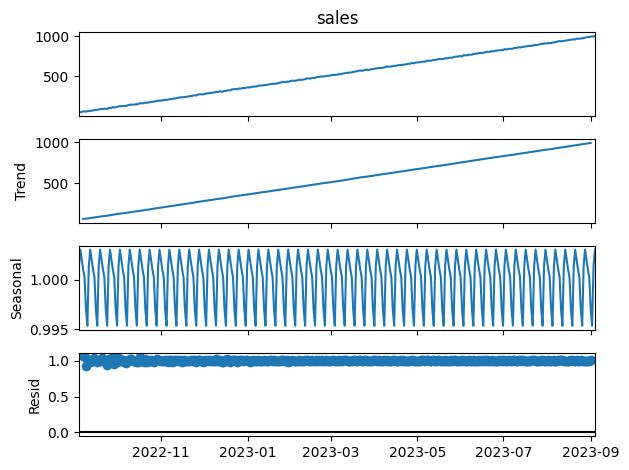

In [30]:
result.plot()
plt.show()

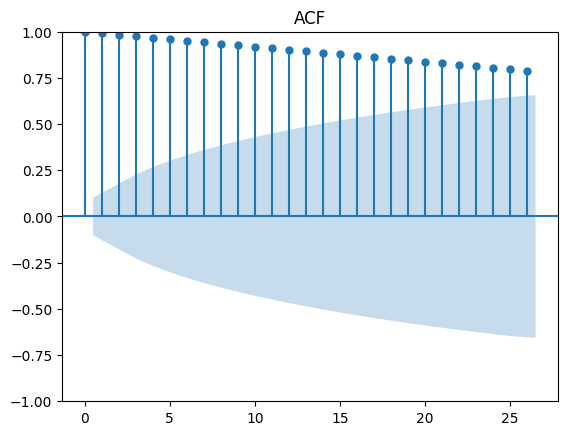

In [31]:
plot_acf(main_df['sales'])
plt.title('ACF')
plt.show()

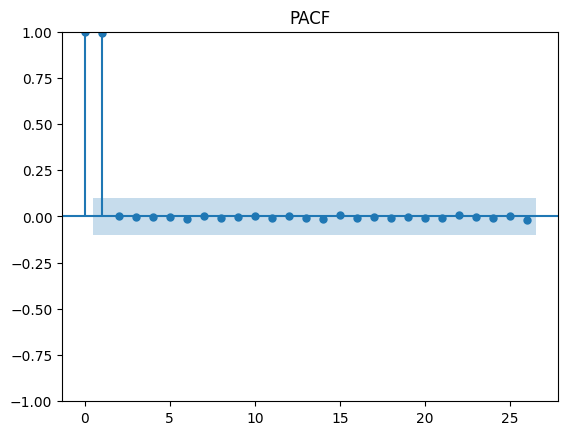

In [32]:
plot_pacf(main_df['sales'])
plt.title('PACF')
plt.show()

In [35]:
# Dickey-Fuller Test

result_adf = adfuller(main_df['sales'])
print('ADF Statistic:', result_adf[0])
print('p-value:', result_adf[1])
print('Critical Values:')
for key, value in result_adf[4].items():
    print(f'\t{key}: {value:.3f}')

ADF Statistic: 0.5454141937063742
p-value: 0.9861899815311063
Critical Values:
	1%: -3.449
	5%: -2.870
	10%: -2.571


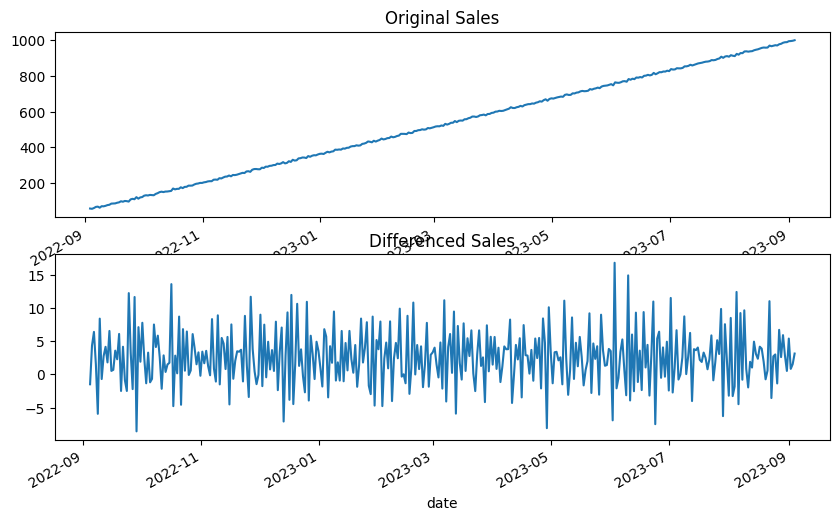

In [37]:
main_df['sales_diff'] = main_df['sales'].diff().dropna()

fig, axes = plt.subplots(2, 1, figsize=(10, 6))
main_df['sales'].plot(ax=axes[0], title='Original Sales')
main_df['sales_diff'].plot(ax=axes[1], title='Differenced Sales')
plt.show()

In [39]:
result_adf = adfuller(main_df['sales_diff'].dropna())
print('ADF Statistic:', result_adf[0])
print('p-value:', result_adf[1])
print('Critical Values:')
for key, value in result_adf[4].items():
    print(f'\t{key}: {value:.3f}')

ADF Statistic: -9.43026311833474
p-value: 5.212954111417066e-16
Critical Values:
	1%: -3.449
	5%: -2.870
	10%: -2.571


In [40]:
main_df.dropna(inplace=True)

main_df.head()

,sales,sales_diff
date,,
2022-09-04 17:10:08.079328,53.803211,-1.488946
2022-09-05 17:10:08.079328,58.141693,4.338482
2022-09-06 17:10:08.079328,64.530899,6.389205
2022-09-07 17:10:08.079328,66.013633,1.482734
2022-09-08 17:10:08.079328,60.081865,-5.931768


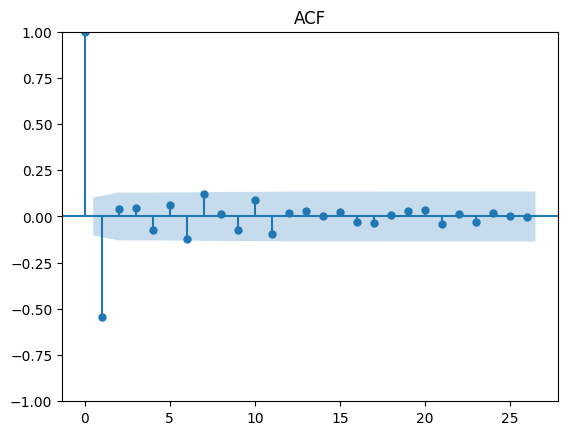

In [42]:
plot_acf(main_df['sales_diff'])
plt.title('ACF')
plt.show()

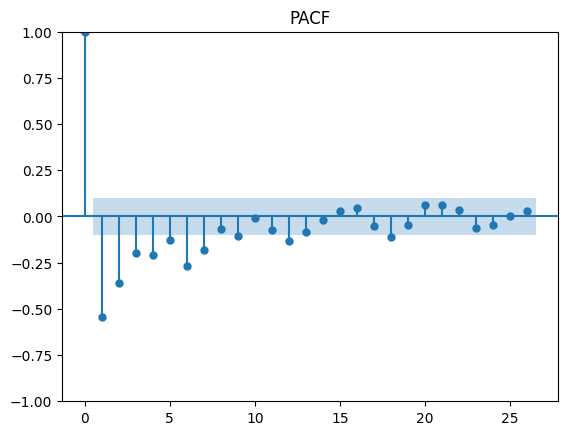

In [43]:
plot_pacf(main_df['sales_diff'])
plt.title('PACF')
plt.show()

/home/vscode/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/vscode/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/vscode/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/vscode/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


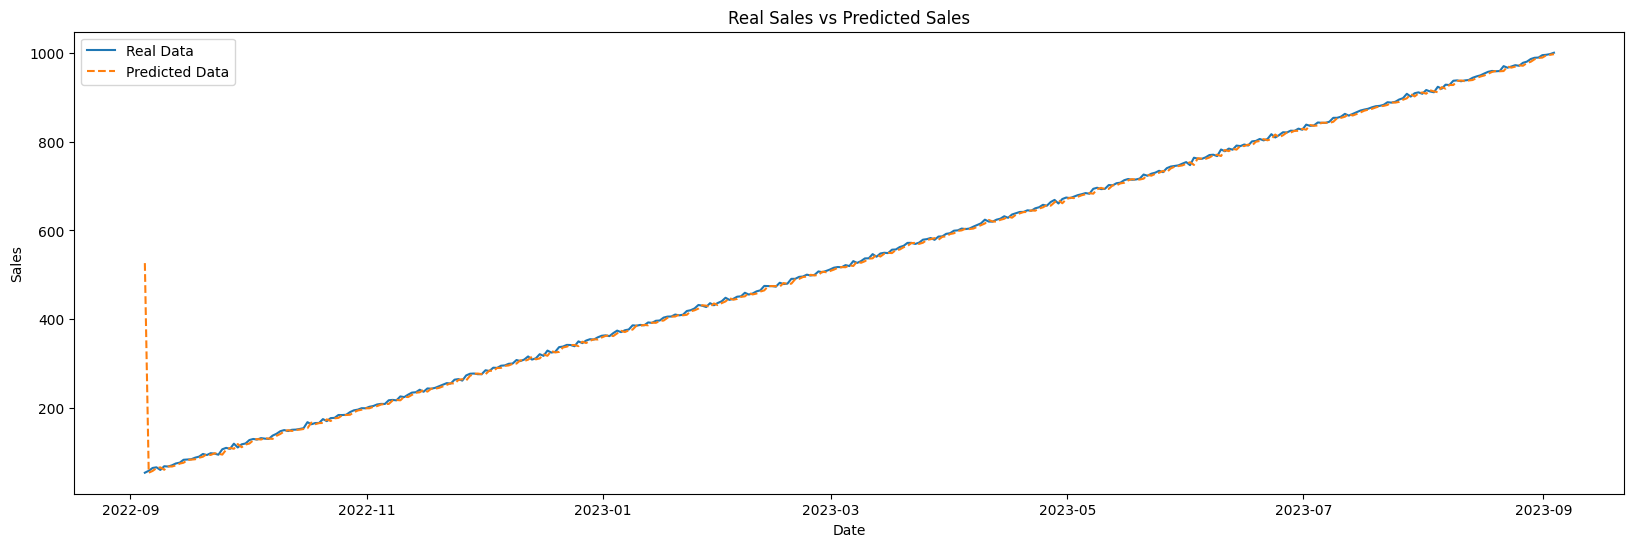

In [45]:
p = 1
q = 1

model =  ARIMA(main_df['sales'], order=(p, 0, q))
model = model.fit()

predictions = model.predict(start=0, end=len(main_df)-1)

plt.figure(figsize=(20, 6))

plt.plot(main_df.index, main_df['sales'], label='Real Data')
plt.plot(main_df.index, predictions, label='Predicted Data', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Real Sales vs Predicted Sales')
plt.legend()

plt.show()

In [46]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score

mae = mean_absolute_error(main_df['sales'], predictions)
mse = mean_squared_error(main_df['sales'], predictions)
mape = mean_absolute_percentage_error(main_df['sales'], predictions)
r2 = r2_score(main_df['sales'], predictions)

print(f'Result for MAE: {mae}')
print(f'Result for MSE: {mse}')
print(f'Result for MAPE: {mape}')
print(f'Result for R-squared: {r2}')

Result for MAE: 5.2142443995404895
Result for MSE: 636.0814927665768
Result for MAPE: 0.03604956366727313
Result for R-squared: 0.9915266327349175


/home/vscode/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/vscode/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/vscode/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/vscode/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/vscode/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-i

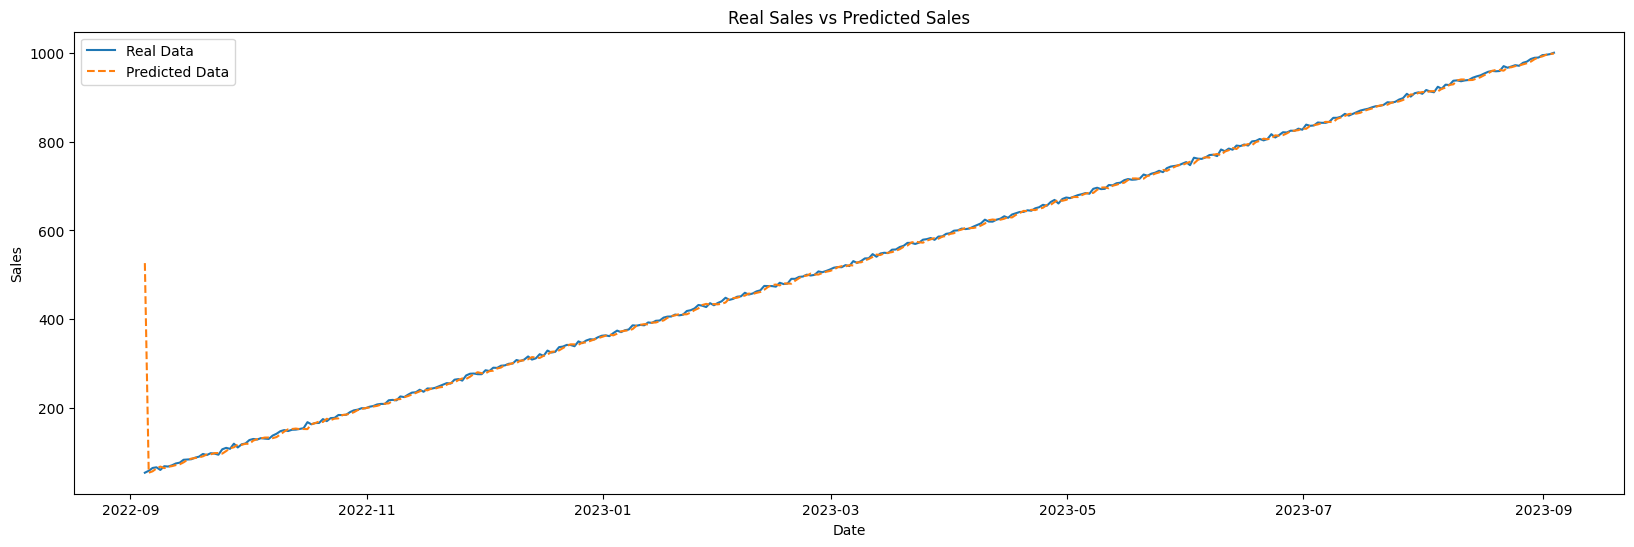

In [47]:
p = 2
q = 6

model =  ARIMA(main_df['sales'], order=(p, 0, q))
model = model.fit()

predictions = model.predict(start=0, end=len(main_df)-1)

plt.figure(figsize=(20, 6))

plt.plot(main_df.index, main_df['sales'], label='Real Data')
plt.plot(main_df.index, predictions, label='Predicted Data', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Real Sales vs Predicted Sales')
plt.legend()

plt.show()

In [49]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score

mae = mean_absolute_error(main_df['sales'], predictions)
mse = mean_squared_error(main_df['sales'], predictions)
mape = mean_absolute_percentage_error(main_df['sales'], predictions)
r2 = r2_score(main_df['sales'], predictions)

print(f'Result for MAE: {mae}')
print(f'Result for MSE: {mse}')
print(f'Result for MAPE: {mape}')
print(f'Result for R-squared: {r2}')

Result for MAE: 4.745203637511625
Result for MSE: 630.5440632989767
Result for MAPE: 0.034817946516752574
Result for R-squared: 0.9916003979271405
